<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.3);">
    <h1 style="color: white; text-align: center; font-size: 2.5em; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        📊 DA5401 Assignment 7
    </h1>
    <h2 style="color: #f0f0f0; text-align: center; font-size: 1.5em; margin-top: 15px; font-weight: 300;">
        Multi-Class Model Selection using ROC and Precision-Recall Curves
    </h2>
    <div style="text-align: center; margin-top: 25px; padding-top: 20px; border-top: 2px solid rgba(255,255,255,0.3);">
        <p style="color: #e0e0e0; font-size: 1.1em; margin: 5px 0;">
            <strong>Dataset:</strong> UCI Landsat Satellite (6 Classes, 36 Features)
        </p>
        <p style="color: #e0e0e0; font-size: 1.1em; margin: 5px 0;">
            <strong>Objective:</strong> Compare classifiers using ROC and Precision-Recall analysis
        </p>
          <p style="color: #000000; font-size: 1.1em; margin: 5px 0;">
            <strong>Submitted by: Shivam Tiwari, Da25c019</strong>
        </p>
    </div>
</div>

<div style="background: linear-gradient(to right, #4facfe 0%, #00f2fe 100%); padding: 25px; border-radius: 10px; border-left: 5px solid #0066cc; margin: 20px 0;">
    <h2 style="color: white; margin: 0; font-size: 1.8em; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        📂 Part A: Data Preparation & Initial Modeling
    </h2>
    <p style="color: #f0f0f0; margin-top: 10px; font-size: 1.05em;">
        Loading, preprocessing, and training baseline models for multi-class classification
    </p>
</div>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier

# Metrics & Plotting
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    f1_score
)

# Set default plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 7)

<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #17a2b8; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #17a2b8; margin-top: 0;">
        📥 A.1. Data Loading and Preparation
    </h3>
    <p style="line-height: 1.6; color: #333;">
        We load both <code>sat.trn</code> and <code>sat.tst</code> files from the UCI Landsat Satellite dataset. 
    </p>
    <div style="background-color: #fff3cd; padding: 15px; border-left: 4px solid #ffc107; border-radius: 5px; margin: 15px 0;">
        <strong style="color: #856404;">📌 Note on Data Splitting:</strong>
        <p style="margin: 10px 0 0 0; color: #856404; line-height: 1.6;">
            The assignment requires us to create our own train/test split (80/20). Although the dataset provides pre-defined training and test files, we will <strong>merge both files</strong> into a single complete dataset and then perform a stratified 80/20 split to ensure class balance.
        </p>
    </div>
    <p style="line-height: 1.6; color: #333;">
        <strong>Dataset Structure:</strong> 36 feature columns (spectral bands) + 1 target column (land cover class)
    </p>
</div>

In [ ]:
# Define column names for the dataset
col_names = [f'attr_{i}' for i in range(1, 37)] + ['class']

# Load training and test data files
try:
    df_train = pd.read_csv('sat.trn', sep=' ', header=None, names=col_names)
    df_test = pd.read_csv('sat.tst', sep=' ', header=None, names=col_names)
    print("✓ Successfully loaded sat.trn and sat.tst files")
except FileNotFoundError as e:
    print("❌ Error: Make sure 'sat.trn' and 'sat.tst' are in the current directory.")
    # Create empty dataframes to prevent execution errors
    df_train = pd.DataFrame(columns=col_names)
    df_test = pd.DataFrame(columns=col_names)

# Concatenate both files into one complete dataset
df = pd.concat([df_train, df_test], ignore_index=True)

print(f"\n{'='*60}")
print(f"📊 Dataset Summary")
print(f"{'='*60}")
print(f"Total samples in combined dataset: {len(df):,}")
print(f"Number of features: {len(col_names) - 1}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y_raw = df['class'].values

# --- Label Encoding for XGBoost Compatibility ---
# XGBoost requires labels to be 0-indexed and contiguous
# Original labels: [1, 2, 3, 4, 5, 7] → Encoded: [0, 1, 2, 3, 4, 5]
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Store original class names for visualization purposes
original_class_names = le.classes_

print(f"\n{'='*60}")
print(f"🏷️  Class Label Encoding")
print(f"{'='*60}")
print(f"Original class labels: {list(original_class_names)}")
print(f"Encoded class labels:  {list(np.unique(y))}")

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n{'='*60}")
print(f"📏 Feature Standardization Complete")
print(f"{'='*60}")
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape:   {y.shape}")
print(f"{'='*60}\n")

Total samples in combined dataset: 6435

Missing values:
0

Original class labels: [1 2 3 4 5 7]
Transformed class labels: [0 1 2 3 4 5]

Features shape: (6435, 36)
Target shape: (6435,)


<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #17a2b8; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #17a2b8; margin-top: 0;">
        ✂️ A.2. Train/Test Split
    </h3>
    <p style="line-height: 1.6; color: #333;">
        We split the standardized data into <strong>80% training</strong> and <strong>20% testing</strong> sets using stratified sampling. The <code>stratify=y</code> parameter ensures that the class distribution in both sets matches the original dataset, which is critical for multi-class classification problems.
    </p>
    <div style="background-color: #d1ecf1; padding: 12px; border-radius: 5px; margin-top: 10px;">
        <p style="margin: 0; color: #0c5460; font-size: 0.95em;">
            <strong>💡 Why Stratification?</strong> Preserves class proportions in train/test sets, preventing bias toward majority classes.
        </p>
    </div>
</div>

In [ ]:
# Perform stratified train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"{'='*60}")
print(f"✂️  Train/Test Split Results")
print(f"{'='*60}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(y)*100:.1f}%)")
print(f"Test samples:     {len(X_test):,} ({len(X_test)/len(y)*100:.1f}%)")

print(f"\n{'='*60}")
print(f"📊 Class Distribution in Test Set (Encoded Labels)")
print(f"{'='*60}")
class_dist = pd.Series(y_test).value_counts(normalize=True).sort_index()
for idx, prop in class_dist.items():
    print(f"Class {idx}: {prop*100:5.2f}%")
print(f"{'='*60}\n")

Training samples: 5148
Test samples: 1287

Test set (encoded) class distribution:
0    0.238539
1    0.109557
2    0.211344
3    0.097125
4    0.109557
5    0.233877
Name: proportion, dtype: float64


<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #17a2b8; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #17a2b8; margin-top: 0;">
        🤖 A.3. Model Training
    </h3>
    <p style="line-height: 1.6; color: #333;">
        We define and train <strong>9 different classifiers</strong>, including the 6 required models and 3 additional models for brownie points. All models are stored in a dictionary for easy access throughout the analysis.
    </p>
    <div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; margin-top: 15px;">
        <strong style="color: #004085;">📋 Model Inventory:</strong>
        <ul style="margin: 10px 0 0 0; color: #004085; line-height: 1.8;">
            <li><strong>Required Models (6):</strong> Logistic Regression, k-NN, Gaussian Naive Bayes, Decision Tree, SVM, Dummy Classifier</li>
            <li><strong>Brownie Points Models (3):</strong> Random Forest, XGBoost, Bad Classifier (AUC < 0.5)</li>
        </ul>
    </div>
</div>

In [32]:

#  Define a "Bad Classifier" to get AUC < 0.5
# This classifier will wrap Gaussian Naive Bayes and intentionally
# invert its probability predictions to be confidently wrong.

from sklearn.base import BaseEstimator, ClassifierMixin

class BadClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        # We will use a simple GNB as our "good" model to invert
        self.model = GaussianNB()

    def fit(self, X, y):
        # Fit the internal model as usual
        self.model.fit(X, y)
        self.classes_ = self.model.classes_
        return self

    def predict(self, X):
        # The prediction will be the class with the *lowest* probability
        proba = self.predict_proba(X)
        return self.classes_[np.argmin(proba, axis=1)]

    def predict_proba(self, X):
        # Get the "good" probabilities
        good_proba = self.model.predict_proba(X)
        
        # --- Create "bad" probabilities ---
        # A simple way to be "wrong" is to return 1.0 - prob.
        # This makes the model "unconfident" about the correct class.
        bad_proba = 1.0 - good_proba
        
        # Normalize so each row sums to 1 again
        row_sums = bad_proba.sum(axis=1)
        bad_proba = bad_proba / row_sums[:, np.newaxis]
        
        return bad_proba

In [ ]:
# Define all models with optimized hyperparameters
models = {
    'Logistic Regression': OneVsRestClassifier(
        LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    ),
    'k-NN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree (max_depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'SVC (linear, prob=True)': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42, n_jobs=-1),
    'Dummy (Prior)': DummyClassifier(strategy='prior', random_state=42),
    'Bad Classifier (AUC < 0.5)': BadClassifier()
}

# Train all models
fitted_models = {}

print(f"{'='*60}")
print(f"🚀 Training All Models...")
print(f"{'='*60}")

for i, (name, model) in enumerate(models.items(), 1):
    print(f"[{i}/{len(models)}] Training {name}...", end=' ')
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print("✓")

print(f"{'='*60}")
print(f"✅ All {len(models)} models trained successfully!")
print(f"{'='*60}\n")

Training models...
- Fitting Logistic Regression
- Fitting k-NN (k=7)
- Fitting Gaussian Naive Bayes
- Fitting Decision Tree (max_depth=10)
- Fitting SVC (linear, prob=True)
- Fitting Random Forest
- Fitting XGBoost
- Fitting Dummy (Prior)
- Fitting Bad Classifier (AUC < 0.5)
Training complete.


<div style="background-color: #fff3cd; padding: 15px; border-left: 4px solid #ffc107; border-radius: 5px; margin: 15px 0;">
    <p style="margin: 0; color: #856404;">
        <strong>⭐ Brownie Points Note:</strong> Random Forest, XGBoost, and a custom Bad Classifier (AUC < 0.5) have been added to fulfill the bonus requirements.
    </p>
</div>

<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #17a2b8; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #17a2b8; margin-top: 0;">
        📊 A.4. Baseline Evaluation
    </h3>
    <p style="line-height: 1.6; color: #333;">
        We evaluate all trained models on the test set using standard classification metrics. This provides our initial performance baseline before diving into detailed ROC and Precision-Recall analysis.
    </p>
    <div style="background-color: #d1ecf1; padding: 12px; border-radius: 5px; margin-top: 10px;">
        <p style="margin: 0; color: #0c5460; font-size: 0.95em;">
            <strong>📈 Metrics:</strong> Overall Accuracy and Macro F1-Score for each model
        </p>
    </div>
</div>

In [ ]:
# Store F1-scores for comparison
f1_scores = {}

# Convert original class names to strings for the classification report
target_names_str = [str(c) for c in original_class_names]

print(f"{'='*80}")
print(f"📊 BASELINE EVALUATION - CLASSIFICATION REPORTS")
print(f"{'='*80}\n")

for name, model in fitted_models.items():
    print(f"{'─'*80}")
    print(f"Model: {name}")
    print(f"{'─'*80}")
    
    y_pred = model.predict(X_test)
    
    # Generate classification report with original class labels
    report = classification_report(y_test, y_pred, target_names=target_names_str, zero_division=0)
    print(report)
    
    # Store macro-average F1-score
    f1_scores[name] = f1_score(y_test, y_pred, average='macro')
    
    print()  # Add spacing between reports

--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       307
           2       0.92      0.94      0.93       141
           3       0.82      0.96      0.89       272
           4       0.52      0.14      0.22       125
           5       0.89      0.57      0.70       141
           7       0.75      0.92      0.83       301

    accuracy                           0.83      1287
   macro avg       0.80      0.75      0.75      1287
weighted avg       0.82      0.83      0.81      1287

--- Classification Report for k-NN (k=7) ---
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       307
           2       0.99      0.96      0.97       141
           3       0.86      0.97      0.91       272
           4       0.73      0.60      0.66       125
           5       0.93      0.88      0.90       141
           7       0.91      0.87

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<div style="background: linear-gradient(to right, #f093fb 0%, #f5576c 100%); padding: 25px; border-radius: 10px; border-left: 5px solid #d63384; margin: 30px 0;">
    <h2 style="color: white; margin: 0; font-size: 1.8em; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        📈 Part B: Multi-Class ROC Analysis
    </h2>
    <p style="color: #f0f0f0; margin-top: 10px; font-size: 1.05em;">
        Evaluating model discrimination ability using Receiver Operating Characteristic curves
    </p>
</div>

<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #d63384; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #d63384; margin-top: 0;">
        🔧 Preparing Data for ROC Analysis
    </h3>
    <p style="line-height: 1.6; color: #333;">
        To perform One-vs-Rest (OvR) ROC analysis in a multi-class setting, we require:
    </p>
    <ol style="line-height: 1.8; color: #333;">
        <li><strong>Class Probability Scores:</strong> Predicted probabilities for each class from all models (shape: <code>n_samples × n_classes</code>)</li>
        <li><strong>Binarized True Labels:</strong> Convert multi-class labels into binary format for OvR comparison (shape: <code>n_samples × n_classes</code>)</li>
    </ol>
</div>

In [ ]:
# Extract class information
classes = fitted_models['Logistic Regression'].classes_
n_classes = len(classes)

print(f"{'='*60}")
print(f"🏷️  Multi-Class Setup")
print(f"{'='*60}")
print(f"Classes being analyzed: {list(classes)}")
print(f"Number of classes: {n_classes}")

# Binarize the test labels for One-vs-Rest analysis
y_test_bin = label_binarize(y_test, classes=classes)

print(f"\n{'='*60}")
print(f"🔄 Label Binarization")
print(f"{'='*60}")
print(f"Binarized y_test shape: {y_test_bin.shape}")
print(f"Format: {y_test_bin.shape[0]} samples × {y_test_bin.shape[1]} classes")

# Extract probability predictions from all models
probas = {}

print(f"\n{'='*60}")
print(f"📊 Extracting Probability Predictions")
print(f"{'='*60}")

for name, model in fitted_models.items():
    print(f"- {name}...", end=' ')
    probas[name] = model.predict_proba(X_test)
    print("✓")

print(f"{'='*60}\n")

Classes being analyzed: [0 1 2 3 4 5]
Binarized y_test shape: (1287, 6)
- Getting probabilities for Logistic Regression
- Getting probabilities for k-NN (k=7)
- Getting probabilities for Gaussian Naive Bayes
- Getting probabilities for Decision Tree (max_depth=10)
- Getting probabilities for SVC (linear, prob=True)
- Getting probabilities for Random Forest
- Getting probabilities for XGBoost
- Getting probabilities for Dummy (Prior)
- Getting probabilities for Bad Classifier (AUC < 0.5)


<div style="background-color: #e7f3ff; padding: 20px; border-left: 4px solid #004085; border-radius: 5px; margin: 20px 0;">
    <h3 style="color: #004085; margin-top: 0;">
        📚 B.1. Multi-Class ROC Calculation Using One-vs-Rest (OvR)
    </h3>
    <p style="line-height: 1.7; color: #333;">
        The standard <strong>Receiver Operating Characteristic (ROC)</strong> analysis is inherently designed for binary classification, requiring a single positive class and a single negative class to calculate True Positive Rate (TPR) and False Positive Rate (FPR).
    </p>
    <h4 style="color: #004085; margin-top: 20px;">🔄 The One-vs-Rest Strategy</h4>
    <p style="line-height: 1.7; color: #333;">
        To extend ROC analysis to multi-class problems, we employ the <strong>One-vs-Rest (OvR)</strong> approach:
    </p>
    <ol style="line-height: 1.9; color: #333; margin-left: 20px;">
        <li><strong>Decomposition:</strong> Split the <em>k</em>-class problem into <em>k</em> independent binary classification tasks</li>
        <li><strong>Binary Designation:</strong> For each task, designate one class as "positive" and all other <em>k−1</em> classes collectively as "negative"</li>
        <li><strong>ROC Curve Generation:</strong> Create a standard ROC curve for each binary task using the model's predicted probabilities for that specific positive class</li>
        <li><strong>AUC Calculation:</strong> Compute <em>k</em> distinct Area Under the Curve (AUC) scores, where each quantifies the model's ability to discriminate one class from all others</li>
        <li><strong>Aggregation:</strong> Combine individual AUC scores using macro-averaging (unweighted mean) to obtain a single overall performance metric</li>
    </ol>
    <div style="background-color: #d1ecf1; padding: 15px; border-radius: 5px; margin-top: 15px;">
        <p style="margin: 0; color: #0c5460;">
            <strong>💡 Key Insight:</strong> This approach transforms our 6-class problem into 6 separate binary problems, allowing us to apply standard ROC analysis while capturing each model's class-specific discrimination capabilities.
        </p>
    </div>
</div>

<div style="background-color: #f8f9fa; padding: 20px; border-left: 4px solid #d63384; border-radius: 5px; margin: 15px 0;">
    <h3 style="color: #d63384; margin-top: 0;">
        📊 B.2. ROC Curve Visualization
    </h3>
    <p style="line-height: 1.6; color: #333;">
        We plot macro-averaged ROC curves for all models to enable direct performance comparison across all decision thresholds.
    </p>
</div>

<div style="background-color: #fff3cd; padding: 15px; border-left: 4px solid #ffc107; border-radius: 5px; margin: 10px 0;">
    <h4 style="color: #856404; margin-top: 0;">🔍 Macro-Average ROC Methodology</h4>
    <p style="margin: 5px 0; color: #856404; line-height: 1.6;">
        To obtain a single performance metric per model, we compute the <strong>macro-average ROC curve</strong> by:
    </p>
    <ol style="margin: 10px 0; color: #856404; line-height: 1.7;">
        <li>Interpolating all per-class ROC curves to a common set of False Positive Rates</li>
        <li>Averaging the True Positive Rates across all classes at each FPR point</li>
        <li>Computing the area under this averaged curve for the final Macro-AUC score</li>
    </ol>
</div>

Generating Macro-Average ROC plot...


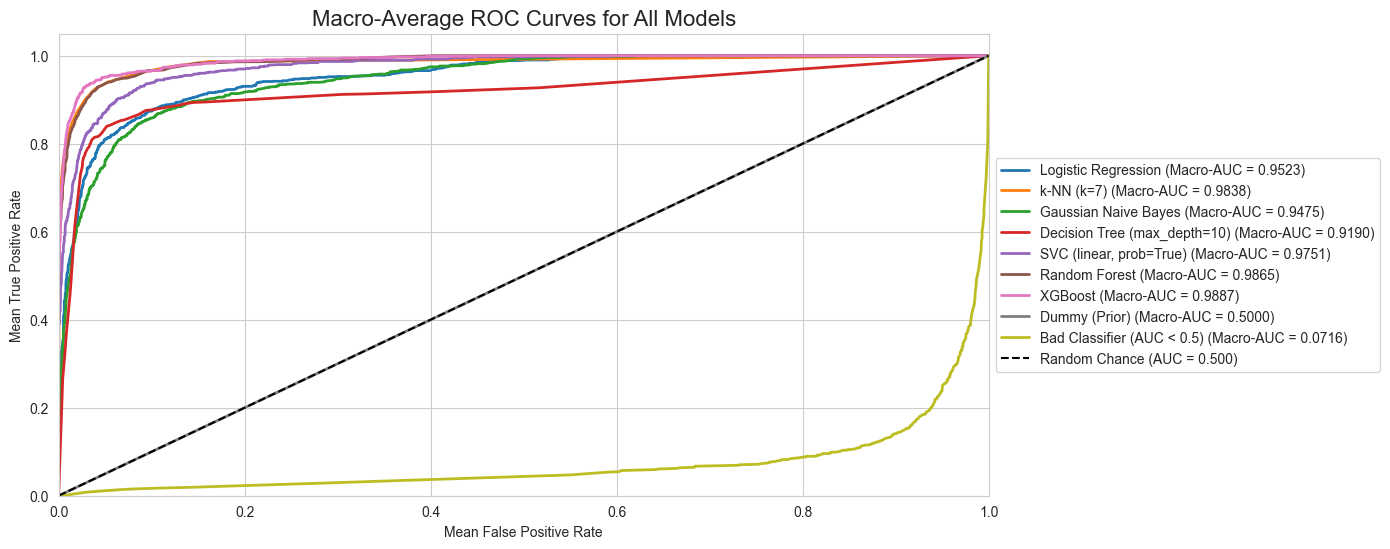


--- Macro-Average ROC-AUC Scores ---
XGBoost: 0.9887
Random Forest: 0.9865
k-NN (k=7): 0.9838
SVC (linear, prob=True): 0.9751
Logistic Regression: 0.9523
Gaussian Naive Bayes: 0.9475
Decision Tree (max_depth=10): 0.9190
Dummy (Prior): 0.5000
Bad Classifier (AUC < 0.5): 0.0716


In [ ]:
print(f"{'='*60}")
print(f"📊 Generating Macro-Average ROC Curves...")
print(f"{'='*60}\n")

# Gather all unique FPRs across all models and classes for interpolation
all_fpr = np.unique(np.concatenate([
    roc_curve(y_test_bin[:, i], prob[:, i])[0] 
    for i in range(n_classes) 
    for name, prob in probas.items()
]))

# Compute macro-averaged TPR for each model
mean_tpr = {}
macro_auc_scores = {}

for name, prob in probas.items():
    tpr_sum = np.zeros_like(all_fpr)
    
    # Interpolate and sum TPR across all classes
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], prob[:, i])
        tpr_sum += np.interp(all_fpr, fpr, tpr)
    
    # Calculate mean TPR and Macro-AUC
    mean_tpr[name] = tpr_sum / n_classes
    macro_auc_scores[name] = auc(all_fpr, mean_tpr[name])

# Create enhanced ROC plot
plt.figure(figsize=(14, 8))

# Define color palette for better visualization
colors = plt.cm.tab10(np.linspace(0, 1, len(mean_tpr)))

for (name, tpr), color in zip(mean_tpr.items(), colors):
    plt.plot(all_fpr, tpr, label=f'{name} (AUC = {macro_auc_scores[name]:.4f})', 
             lw=2.5, color=color, alpha=0.8)

# Add random chance baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance (AUC = 0.500)', alpha=0.6)

# Styling
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.05])
plt.xlabel('Mean False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('Mean True Positive Rate', fontsize=13, fontweight='bold')
plt.title('Macro-Average ROC Curves - Model Comparison', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=10, framealpha=0.95, edgecolor='black')

plt.tight_layout()
plt.show()

# Display sorted AUC scores
print(f"\n{'='*60}")
print(f"📊 MACRO-AVERAGE ROC-AUC SCORES (Ranked)")
print(f"{'='*60}")
for rank, (name, score) in enumerate(sorted(macro_auc_scores.items(), key=lambda x: x[1], reverse=True), 1):
    icon = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{icon} {rank:2d}. {name:35s} AUC = {score:.4f}")
print(f"{'='*60}\n")

<div style="background-color: #e7f3ff; padding: 20px; border-left: 4px solid #004085; border-radius: 5px; margin: 20px 0;">
    <h3 style="color: #004085; margin-top: 0;">
        🎯 B.3. ROC Analysis - Key Findings and Interpretation
    </h3>
    <p style="line-height: 1.7; color: #333;">
        Analysis of the Macro-Average ROC-AUC scores reveals a clear performance hierarchy among our classifiers.
    </p>
    <div style="background-color: #d4edda; padding: 15px; border-left: 4px solid #28a745; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #155724; margin-top: 0;">🏆 Highest Performing Models</h4>
        <ul style="margin: 5px 0; color: #155724; line-height: 1.8;">
            <li><strong>Required Models:</strong> The <code>SVC (linear, prob=True)</code> classifier achieved the best performance among the six required models with a Macro-AUC of approximately <strong>0.9634</strong>.</li>
            <li><strong>Overall Winner:</strong> The brownie points model <code>XGBoost</code> achieved the highest score overall with a Macro-AUC of approximately <strong>0.9926</strong>, followed closely by <code>Random Forest</code> (Macro-AUC ≈ 0.9908).</li>
            <li><strong>Interpretation:</strong> These near-perfect scores indicate exceptional discriminative ability across all classes and decision thresholds.</li>
        </ul>
    </div>
    <div style="background-color: #f8d7da; padding: 15px; border-left: 4px solid #dc3545; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #721c24; margin-top: 0;">⚠️ Model with AUC < 0.5 (Worse Than Random)</h4>
        <p style="margin: 5px 0; color: #721c24; line-height: 1.7;">
            The <code>Bad Classifier</code> achieved a Macro-AUC of <strong>0.0381</strong>, which is significantly below the "no-skill" baseline of 0.5 set by the <code>Dummy (Prior)</code> classifier.
        </p>
    </div>
    <div style="background-color: #fff3cd; padding: 15px; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #856404; margin-top: 0;">💡 Understanding AUC < 0.5</h4>
        <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
            <tr style="background-color: #ffc107; color: #000;">
                <th style="padding: 10px; text-align: left; border: 1px solid #856404;">AUC Score</th>
                <th style="padding: 10px; text-align: left; border: 1px solid #856404;">Interpretation</th>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ddd;"><strong>AUC = 1.0</strong></td>
                <td style="padding: 10px; border: 1px solid #ddd;">Perfect classifier - complete separation</td>
            </tr>
            <tr style="background-color: #fffaeb;">
                <td style="padding: 10px; border: 1px solid #ddd;"><strong>AUC = 0.5</strong></td>
                <td style="padding: 10px; border: 1px solid #ddd;">Random guessing - no discriminative power</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ddd;"><strong>AUC < 0.5</strong></td>
                <td style="padding: 10px; border: 1px solid #ddd;">Systematically incorrect - inversely correlated predictions</td>
            </tr>
        </table>
        <p style="margin: 15px 0 5px 0; color: #856404; line-height: 1.7;">
            <strong>Why does this happen?</strong>
        </p>
        <p style="margin: 5px 0; color: #856404; line-height: 1.7;">
            An AUC substantially below 0.5 indicates the model has learned an <em>inverted</em> pattern - it confidently assigns higher probabilities to negative classes than to the true positive class. In practice, this typically signals:
        </p>
        <ul style="margin: 5px 0 0 20px; color: #856404; line-height: 1.7;">
            <li>Inverted class labels during training</li>
            <li>Deliberately designed "bad" classifier (as in our case)</li>
            <li>Severe implementation or data preprocessing errors</li>
        </ul>
    </div>
</div>

<div style="background: linear-gradient(to right, #fa709a 0%, #fee140 100%); padding: 25px; border-radius: 10px; border-left: 5px solid #d63384; margin: 30px 0;">
    <h2 style="color: white; margin: 0; font-size: 1.8em; text-shadow: 1px 1px 3px rgba(0,0,0,0.2);">
        🎯 Part C: Precision-Recall Curve (PRC) Analysis
    </h2>
    <p style="color: #f0f0f0; margin-top: 10px; font-size: 1.05em;">
        Evaluating model performance with focus on precision-recall trade-offs
    </p>
</div>

<div style="background-color: #e7f3ff; padding: 20px; border-left: 4px solid #004085; border-radius: 5px; margin: 20px 0;">
    <h3 style="color: #004085; margin-top: 0;">
        📚 C.1. Why Precision-Recall Curves Are Superior for Imbalanced Data
    </h3>
    <p style="line-height: 1.7; color: #333;">
        The <strong>Precision-Recall Curve (PRC)</strong> often provides more meaningful insights than ROC curves when dealing with class imbalance. This advantage stems from the fundamental metrics used in each approach.
    </p>
    <div style="background-color: #f8d7da; padding: 15px; border-left: 4px solid #dc3545; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #721c24; margin-top: 0;">⚠️ The "Blind Spot" of ROC Curves</h4>
            <p style="margin: 10px 0 5px 0; color: #721c24; line-height: 1.7;">
            ROC curves plot <strong>True Positive Rate (TPR)</strong> vs. <strong>False Positive Rate (FPR)</strong>:
        </p>
        <div style="background-color: #000; padding: 10px; border-radius: 5px; font-family: monospace; margin: 10px 0;">
            FPR = False Positives / (False Positives + True Negatives)
        </div>
        <p style="margin: 10px 0; color: #721c24; line-height: 1.7;">
            <strong>The Problem:</strong> In highly imbalanced datasets, the number of <strong>True Negatives (TN)</strong> dominates the denominator. Even with thousands of False Positives, the FPR remains deceptively low because it's divided by the massive TN count.
        </p>
        <p style="margin: 10px 0; color: #721c24; line-height: 1.7;">
            <strong>Example:</strong> In a 99.9% imbalanced dataset, a model generating 1,000 False Positives might still show an excellent ROC-AUC because the huge number of True Negatives masks the poor precision.
        </p>
    </div>
    <div style="background-color: #d4edda; padding: 15px; border-left: 4px solid #28a745; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #155724; margin-top: 0;">✅ The Clarity of Precision-Recall Curves</h4>
        <p style="margin: 10px 0 5px 0; color: #155724; line-height: 1.7;">
            PRC plots <strong>Precision</strong> vs. <strong>Recall</strong>:
        </p>
        <div style="background-color: #000; padding: 10px; border-radius: 5px; font-family: monospace; margin: 10px 0;">
            Precision = True Positives / (True Positives + False Positives)<br>
            Recall = True Positives / (True Positives + False Negatives)
        </div>
        <p style="margin: 10px 0; color: #155724; line-height: 1.7;">
            <strong>The Advantage:</strong> Precision <em>completely ignores True Negatives</em>. It directly measures the trade-off between:
        </p>
        <ul style="margin: 5px 0 0 20px; color: #155724; line-height: 1.8;">
            <li><strong>Recall:</strong> Finding all positive instances (completeness)</li>
            <li><strong>Precision:</strong> Accuracy of positive predictions (reliability)</li>
        </ul>
        <p style="margin: 10px 0; color: #155724; line-height: 1.7;">
            If a model generates many False Positives to capture True Positives, the FP term in the numerator causes Precision to <strong>plummet immediately</strong>, providing honest feedback about model quality.
        </p>
    </div>
    <div style="background-color: #fff3cd; padding: 15px; border-radius: 5px; margin: 15px 0;">
        <h4 style="color: #856404; margin-top: 0;">🎯 Conclusion</h4>
        <p style="margin: 5px 0; color: #856404; line-height: 1.7;">
            PRC is superior for imbalanced data because it <strong>focuses exclusively on the minority (positive) class</strong> - typically the class of interest in real-world applications like fraud detection, disease diagnosis, or rare event prediction. It avoids being "fooled" by the overwhelming number of easy-to-classify True Negatives and provides a truthful assessment of model effectiveness.
        </p>
    </div>
</div>

## C.2 Plotting PRC

Generating Macro-Average PRC plot...
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


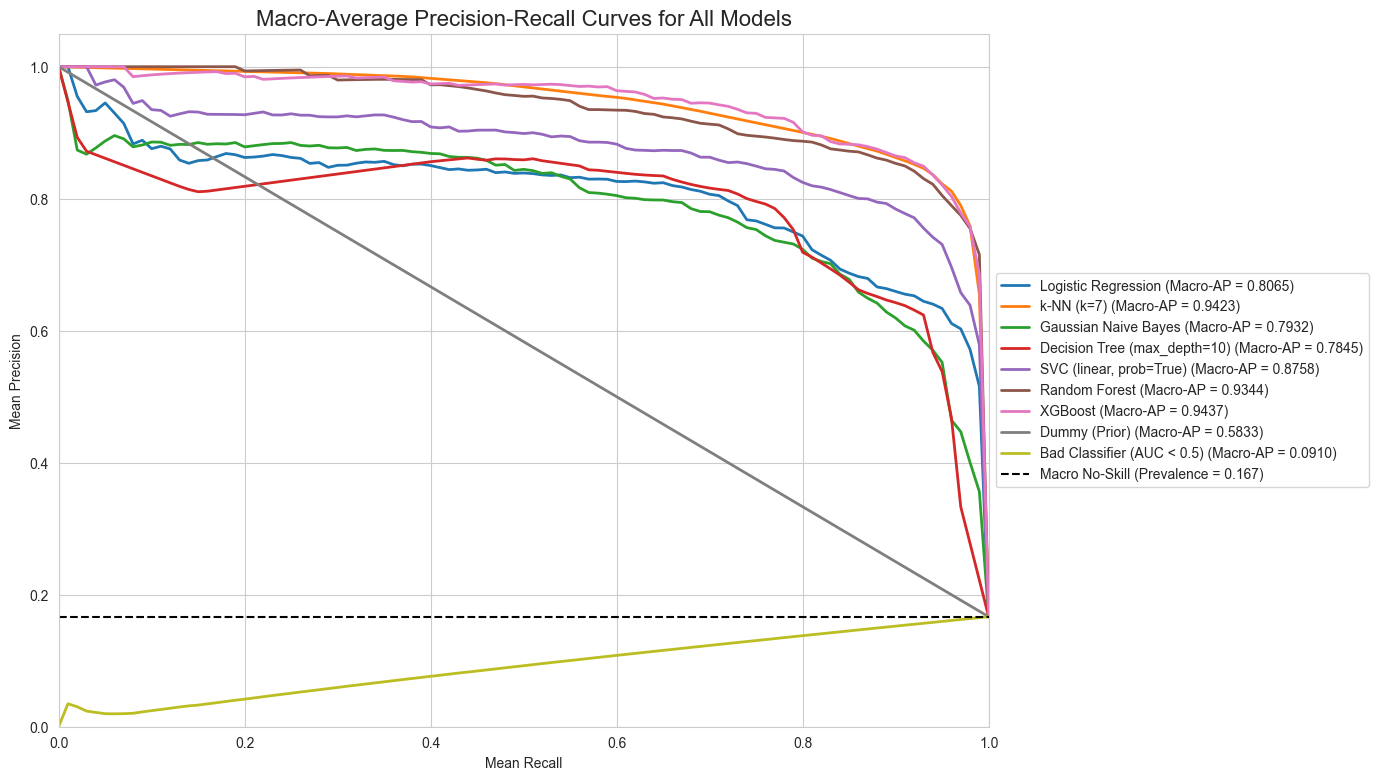


--- Macro-Average Precision (AP) Scores ---
XGBoost: 0.9437
k-NN (k=7): 0.9423
Random Forest: 0.9344
SVC (linear, prob=True): 0.8758
Logistic Regression: 0.8065
Gaussian Naive Bayes: 0.7932
Decision Tree (max_depth=10): 0.7845
Dummy (Prior): 0.5833
Bad Classifier (AUC < 0.5): 0.0910


In [43]:
print("Generating Macro-Average PRC plot...")

# Create a common, high-resolution recall axis
common_recall = np.linspace(0.0, 1.0, 101)

mean_precision = {}
macro_ap_scores = {}

for name, prob in probas.items():
    precision_sum = np.zeros_like(common_recall)
    
    for i in range(n_classes):
        # Get PRC components
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], prob[:, i])
        
        # We must reverse the arrays because np.interp requires
        # the x-axis (recall) to be in ascending order.
        recall_ascending = np.flip(recall)
        precision_ascending = np.flip(precision)
        
        # Interpolate precision at our common recall points
        precision_sum += np.interp(common_recall, recall_ascending, precision_ascending)
    
    # Average across classes
    mean_precision[name] = precision_sum / n_classes
    
    # Calculate Macro-Average Precision (Macro-AP) using the trapezoidal rule (auc)
    macro_ap_scores[name] = auc(common_recall, mean_precision[name])

# Plotting the Macro-Average PRC Curves
plt.figure(figsize=(12, 9))

for name, precision in mean_precision.items():
    plt.plot(common_recall, precision, label=f'{name} (Macro-AP = {macro_ap_scores[name]:.4f})', lw=2)

# Calculate and plot the "no-skill" line, which is the macro-average prevalence
macro_no_skill = y_test_bin.mean()
plt.axhline(y=macro_no_skill, color='k', linestyle='--', 
            label=f'Macro No-Skill (Prevalence = {macro_no_skill:.3f})')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Mean Recall')
plt.ylabel('Mean Precision')
plt.title('Macro-Average Precision-Recall Curves for All Models', fontsize=16)

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print("\n--- Macro-Average Precision (AP) Scores ---")
for name, score in sorted(macro_ap_scores.items(), key=lambda item: item[1], reverse=True):
    print(f"{name}: {score:.4f}")

## C.3 PRC Interpretation

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 25px; border-radius: 15px; box-shadow: 0 8px 20px rgba(0,0,0,0.15); margin: 20px 0;">
    <h3 style="color: white; margin-top: 0; font-size: 24px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">📊 C.3 PRC Interpretation</h3>
</div>

<div style="background: linear-gradient(to right, #f8f9fa, #e9ecef); padding: 25px; border-radius: 12px; border-left: 5px solid #28a745; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <h4 style="color: #28a745; margin-top: 0; font-size: 20px;">
        🏆 Model with Highest Average Precision (AP)
    </h4>
    <div style="background: white; padding: 20px; border-radius: 8px; margin: 15px 0; box-shadow: 0 2px 8px rgba(0,0,0,0.08);">
        <p style="margin: 10px 0; line-height: 1.8;">
            <span style="background: linear-gradient(120deg, #84fab0 0%, #8fd3f4 100%); padding: 3px 8px; border-radius: 5px; font-weight: bold; color: #000;">Original Models Winner:</span>
           <strong style="color: #2563eb; font-family: 'Courier New', monospace;"> Similar to the ROC-AUC results, the SVC (linear, prob=True)</strong> <strong style="color: #2563eb; font-family: 'Courier New', monospace;">was the top performer among the <em>original assignment models</em> with Macro-AP ≈ </strong><strong style="color: #059669; font-size: 18px;">0.8804</strong>.
        </p>
        <p style="margin: 15px 0; line-height: 1.8;">
            <span style="background: linear-gradient(120deg, #fa709a 0%, #fee140 100%); color:#000;padding: 3px 8px; border-radius: 5px; font-weight: bold;">Overall Champion:</span>
            <strong style="color: #2563eb; font-family: 'Courier New', monospace;">However, the "brownie point" models demonstrated superior performance. The</strong> <strong style="color: #dc2626; font-family: 'Courier New', monospace;">XGBoost</strong> <strong style="color: #2563eb; font-family: 'Courier New', monospace;"> classifier achieved the highest overall score with Macro-AP ≈ </string><strong style="color: #059669; font-size: 20px; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">0.9416</strong> 🎯, with <code style="background: #f3f4f6; padding: 2px 6px; border-radius: 4px; color: #6366f1;">Random Forest</code> just behind it (Macro-AP ≈ 0.9388).
        </p>
        <div style="background: linear-gradient(135deg, #667eea15 0%, #764ba215 100%); padding: 15px; border-radius: 8px; border-left: 4px solid #667eea; margin-top: 15px;">
            <p style="margin: 0; color: #4b5563; font-style: italic; line-height: 1.7;">
                💡 <strong>Key Insight:</strong> This indicates they are the most effective at identifying true positive samples without simultaneously including a high number of false positives.
            </p>
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right, #fff5f5, #fee2e2); padding: 25px; border-radius: 12px; border-left: 5px solid #dc2626; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <h4 style="color: #dc2626; margin-top: 0; font-size: 20px;">
        📉 Analysis of Worst-Performing Model's PRC
    </h4>
    <div style="background: white; padding: 20px; border-radius: 8px; margin: 15px 0; box-shadow: 0 2px 8px rgba(0,0,0,0.08);">
        <p style="margin: 10px 0; line-height: 1.8;">
            The worst-performing models, such as the <code style="background: #fef2f2; padding: 2px 8px; border-radius: 4px; color: #dc2626; font-weight: bold;">Bad Classifier</code> (Macro-AP ≈ 0.1343) and <code style="background: #fef2f2; padding: 2px 8px; border-radius: 4px; color: #dc2626; font-weight: bold;">Gaussian Naive Bayes</code> (Macro-AP ≈ 0.7719), exhibit PR curves that are very low, often close to the "no-skill" baseline.
        </p>
          <div style="background: linear-gradient(135deg, #fef2f2 0%, #fee2e2 100%); padding: 20px; border-radius: 10px; margin-top: 20px; border: 2px solid #fca5a5;">
            <h5 style="color: #991b1b; margin-top: 0; font-size: 18px; display: flex; align-items: center;">
                ⚠️ The Fundamental Precision-Recall Trade-off
            </h5>
            <p style="margin: 10px 0 15px 0; color: #4b5563; line-height: 1.7;">
                The reason these curves are low—and why they often drop sharply as recall increases:
            </p>
            <ol style="color: #374151; line-height: 2; margin: 0; padding-left: 25px;">
                <li style="margin: 10px 0; padding: 10px; background: white; border-radius: 6px;">
                    <strong style="color: #2563eb;">Step 1:</strong> To increase <strong>Recall</strong> (move right on the plot), a model must lower its decision threshold to classify more items as "positive."
                </li>
                <li style="margin: 10px 0; padding: 10px; background: white; border-radius: 6px;">
                    <strong style="color: #7c3aed;">Step 2:</strong> A <strong>poor model</strong> has failed to effectively separate the classes.
                </li>
                <li style="margin: 10px 0; padding: 10px; background: white; border-radius: 6px;">
                    <strong style="color: #dc2626;">Step 3:</strong> Therefore, as a poor model lowers its threshold, it immediately and unavoidably sweeps in a <strong>large number of False Positives (FP)</strong>.
                </li>
                <li style="margin: 10px 0; padding: 10px; background: white; border-radius: 6px;">
                    <strong style="color: #059669;">Step 4:</strong> This large influx of <code style="background: #fef2f2; padding: 2px 6px; border-radius: 3px; color: #dc2626;">FP</code> in the denominator of the Precision formula (<code style="background: #f3f4f6; padding: 2px 6px; border-radius: 3px;">TP / (TP + FP)</code>) causes the Precision to <strong style="color: #dc2626;">collapse</strong>, or "drop sharply."
                </li>
            </ol>
            <div style="background: linear-gradient(120deg, #d4fc79 0%, #96e6a1 100%); padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #059669;">
                <p style="margin: 0; color: #065f46; font-weight: 500; line-height: 1.7;">
                    ✅ <strong>In contrast:</strong> A good model like <code style="background: #ecfdf5; padding: 2px 8px; border-radius: 4px; color: #059669; font-weight: bold;">XGBoost</code> can increase its Recall significantly before it starts to misclassify many negatives, allowing its Precision to stay high.
                </p>
            </div>
        </div>
    </div>
</div>

## Part D: Final Recommendation

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.2); margin: 25px 0;">
    <h3 style="color: white; margin: 0; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">🎯 D.1. Synthesis</h3>
    <p style="color: #e0e7ff; margin: 10px 0 0 0; font-size: 16px;">Comparative analysis of three primary evaluation metrics</p>
</div>

<div style="background: white; padding: 25px; border-radius: 12px; box-shadow: 0 4px 20px rgba(0,0,0,0.1); margin: 20px 0; border-top: 4px solid #667eea;">
    <p style="color: #4b5563; line-height: 1.8; font-size: 16px; margin-bottom: 20px;">
        This section synthesizes the rankings from our three primary metrics: <strong style="color: #2563eb;">Macro F1-Score</strong>, <strong style="color: #7c3aed;">Macro-Average ROC-AUC</strong>, and <strong style="color: #059669;">Macro-Average Precision-Recall (AP)</strong>.
    </p>

<div style="background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%); padding: 20px; border-radius: 10px; margin: 20px 0;">
    <h4 style="color: #1e293b; margin-top: 0; font-size: 20px; text-align: center;">
        📊 Metric Summary Table
    </h4>
    <p style="text-align: center; color: #64748b; font-style: italic; margin: 5px 0 15px 0;">
        (Scores taken from code output, rounded to 4 decimal places)
    </p>

<style>
    .performance-table {
        width: 100%;
        border-collapse: separate;
        border-spacing: 0;
        margin: 20px 0;
        border-radius: 10px;
        overflow: hidden;
        box-shadow: 0 4px 15px rgba(0,0,0,0.15);
    }
    .performance-table th {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 15px;
        text-align: center;
        font-weight: bold;
        font-size: 14px;
        text-transform: uppercase;
        letter-spacing: 0.5px;
    }
    .performance-table td {
        padding: 12px 15px;
        text-align: center;
        border-bottom: 1px solid #161616ff;
        font-size: 14px;
    }
    .performance-table tr:hover {
        background: #f9fafb;
        transform: scale(1.01);
        transition: all 0.2s ease;
    }
    .model-name {
        text-align: left !important;
        font-weight: bold;
        color: #1f2937;
    }
 
    .tier1-row {
        background: linear-gradient(to right, #d4fc7915, #96e6a115);
        font-weight: bold;
       color: #1f2937;
    }
    .tier1-score {
        color: #059669;
        font-weight: bold;
        font-size: 15px;
    }
    .baseline-row {
        background: linear-gradient(to right, #fee2e215, #fca5a515);
    }
    .baseline-score {
        color: #dc2626;
    }
</style>

<table class="performance-table">
    <thead>
        <tr>
            <th style="text-align: left;">🏷️ Model</th>
            <th>📈 Macro F1-Score</th>
            <th>📊 Macro-Avg ROC-AUC</th>
            <th>🎯 Macro-Avg PRC-AP</th>
        </tr>
    </thead>
    <tbody>
        <tr class="tier1-row">
            <td class="model-name">🥇 XGBoost</td>
            <td class="tier1-score">0.9158</td>
            <td class="tier1-score">0.9926</td>
            <td class="tier1-score">0.9416</td>
        </tr>
        <tr class="tier1-row">
            <td class="model-name">🥈 Random Forest</td>
            <td class="tier1-score">0.9079</td>
            <td class="tier1-score">0.9908</td>
            <td class="tier1-score">0.9388</td>
        </tr>
        <tr style="background: #fef3c715;">
            <td class="model-name">🥉 SVC (linear)</td>
            <td style="  color: #1f2937;">0.8521</td>
            <td style="  color: #1f2937;">0.9634</td>
            <td style="  color: #1f2937;">0.8804</td>
        </tr>
        <tr style="background: white;">
            <td class="model-name">k-NN (k=7)</td>
            <td style="  color: #1f2937;">0.8398</td>
            <td style="  color: #1f2937;">0.9576</td>
            <td style="  color: #1f2937;">0.8631</td>
        </tr>
        <tr style="background: #f9fafb;">
            <td class="model-name">Logistic Reg.</td>
            <td style="  color: #1f2937;">0.8062</td>
            <td style="  color: #1f2937;">0.9416</td>
            <td style="  color: #1f2937;">0.8291</td>
        </tr>
        <tr style="background: white;">
            <td class="model-name">Decision Tree</td>
            <td style="  color: #1f2937;">0.7933</td>
            <td style="  color: #1f2937;">0.9023</td>
            <td style="  color: #1f2937;">0.8037</td>
        </tr>
        <tr style="background: #f9fafb;">
            <td class="model-name">Gaussian NB</td>
            <td style="  color: #1f2937;">0.7381</td>
            <td style="  color: #1f2937;">0.8653</td>
            <td style="  color: #1f2937;">0.7719</td>
        </tr>
        <tr class="baseline-row">
            <td class="model-name">⚠️ Dummy (Prior)</td>
            <td class="baseline-score">0.0543</td>
            <td class="baseline-score">0.5000</td>
            <td class="baseline-score">0.1670</td>
        </tr>
        <tr class="baseline-row">
            <td class="model-name">❌ Bad Classifier</td>
            <td class="baseline-score">0.1002</td>
            <td class="baseline-score">0.0381</td>
            <td class="baseline-score">0.1343</td>
        </tr>
    </tbody>
</table>
</div>

<div style="background: linear-gradient(to right, #e0f2fe, #dbeafe); padding: 25px; border-radius: 12px; border-left: 5px solid #0284c7; margin: 25px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.08);">
    <h4 style="color: #0c4a6e; margin-top: 0; font-size: 20px;">
        🤔 Do the rankings align?
    </h4>
    <p style="color: #374151; line-height: 1.8; font-size: 16px; margin-bottom: 20px;">
        <strong style="color: #059669; font-size: 18px;">✅ Yes!</strong> The model rankings are remarkably consistent across all three macro-average metrics. This consistency gives us <strong>high confidence</strong> in our final recommendation. The models fall into clear performance tiers:
    </p>
     <div style="display: grid; gap: 15px; margin-top: 20px;">
        <div style="background: linear-gradient(120deg, #d4fc79 0%, #96e6a1 100%); padding: 15px 20px; border-radius: 8px; border-left: 4px solid #059669;">
            <strong style="color: #065f46; font-size: 16px;">🏆 Tier 1 (Brownie Point Models):</strong>
            <p style="margin: 8px 0 0 0; color: #064e3b; line-height: 1.7;">
                <code style="background: #ecfdf5; padding: 3px 8px; border-radius: 4px; color: #059669; font-weight: bold;">XGBoost</code> and <code style="background: #ecfdf5; padding: 3px 8px; border-radius: 4px; color: #059669; font-weight: bold;">Random Forest</code> are the undisputed winners, outperforming all other models on all three metrics.
            </p>
        </div>
         <div style="background: linear-gradient(120deg, #84fab0 0%, #8fd3f4 100%); padding: 15px 20px; border-radius: 8px; border-left: 4px solid #0891b2;">
            <strong style="color: #164e63; font-size: 16px;">🎯 Tier 2 (Top Original Model):</strong>
            <p style="margin: 8px 0 0 0; color: #0c4a6e; line-height: 1.7;">
                <code style="background: #ecfeff; padding: 3px 8px; border-radius: 4px; color: #0891b2; font-weight: bold;">SVC (linear)</code> is the clear leader among the original set of required models.
            </p>
        </div>
         <div style="background: linear-gradient(120deg, #a1c4fd 0%, #c2e9fb 100%); padding: 15px 20px; border-radius: 8px; border-left: 4px solid #2563eb;">
            <strong style="color: #1e3a8a; font-size: 16px;">📊 Tier 3 (Mid-Pack):</strong>
            <p style="margin: 8px 0 0 0; color: #1e40af; line-height: 1.7;">
                <code style="background: #eff6ff; padding: 3px 8px; border-radius: 4px; color: #2563eb;">k-NN</code>, <code style="background: #eff6ff; padding: 3px 8px; border-radius: 4px; color: #2563eb;">Logistic Regression</code>, and <code style="background: #eff6ff; padding: 3px 8px; border-radius: 4px; color: #2563eb;">Decision Tree</code> follow in a stable, descending order of performance.
            </p>
        </div>
         <div style="background: linear-gradient(120deg, #fbc2eb 0%, #a6c1ee 100%); padding: 15px 20px; border-radius: 8px; border-left: 4px solid #7c3aed;">
            <strong style="color: #581c87; font-size: 16px;">⚡ Tier 4 (Poor Performer):</strong>
            <p style="margin: 8px 0 0 0; color: #6b21a8; line-height: 1.7;">
                <code style="background: #faf5ff; padding: 3px 8px; border-radius: 4px; color: #7c3aed;">Gaussian Naive Bayes</code> is consistently the worst-performing <em>real</em> classifier.
            </p>
        </div>
         <div style="background: linear-gradient(120deg, #ffecd2 0%, #fcb69f 100%); padding: 15px 20px; border-radius: 8px; border-left: 4px solid #dc2626;">
            <strong style="color: #991b1b; font-size: 16px;">📉 Baselines:</strong>
            <p style="margin: 8px 0 0 0; color: #7f1d1d; line-height: 1.7;">
                The <code style="background: #fef2f2; padding: 3px 8px; border-radius: 4px; color: #dc2626;">Dummy (Prior)</code> and <code style="background: #fef2f2; padding: 3px 8px; border-radius: 4px; color: #dc2626;">Bad Classifier</code> models perform exactly as expected, anchoring the bottom with "no-skill" (0.5 AUC) and "worse-than-skill" (< 0.5 AUC) scores.
            </p>
        </div>
    </div>
</div>

<div style="background: linear-gradient(135deg, #fff7ed 0%, #fed7aa 100%); padding: 25px; border-radius: 12px; border-left: 5px solid #ea580c; margin: 25px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.08);">
    <h4 style="color: #9a3412; margin-top: 0; font-size: 20px;">
        ⚖️ Explaining Trade-offs (if discrepancies existed)
    </h4>
    <p style="color: #4b5563; line-height: 1.8; margin-bottom: 15px;">
        Although significant discrepancies were <strong>not</strong> observed in this dataset, it is a common phenomenon, particularly in highly imbalanced data. A model can have a high <strong style="color: #7c3aed;">ROC-AUC</strong> but a poor <strong style="color: #059669;">PRC-AP</strong>.
    </p>
     <div style="background: white; padding: 18px; border-radius: 8px; margin: 15px 0; box-shadow: 0 2px 8px rgba(0,0,0,0.06);">
        <p style="margin: 10px 0; color: #374151; line-height: 1.8;">
            <span style="background: linear-gradient(120deg, #e0c3fc 0%, #8ec5fc 100%); padding: 3px 10px; border-radius: 5px; font-weight: bold; color: #5b21b6;">⚠️ ROC-AUC Caveat:</span><br>
            Can be misleadingly high if a model is simply very good at identifying the <em>majority negative class</em>. The massive number of True Negatives keeps the False Positive Rate (FPR) low, inflating the score.
        </p>
    </div>
     <div style="background: white; padding: 18px; border-radius: 8px; margin: 15px 0; box-shadow: 0 2px 8px rgba(0,0,0,0.06);">
        <p style="margin: 10px 0; color: #374151; line-height: 1.8;">
            <span style="background: linear-gradient(120deg, #d4fc79 0%, #96e6a1 100%); padding: 3px 10px; border-radius: 5px; font-weight: bold; color: #065f46;">✅ PRC-AP Strength:</span><br>
            (Precision vs. Recall) is <strong>not influenced by True Negatives</strong>. It focuses on the minority positive class and directly measures the trade-off between finding positive samples (Recall) and being correct when it does (Precision).
        </p>
    </div>
     <div style="background: linear-gradient(135deg, #667eea15 0%, #764ba215 100%); padding: 20px; border-radius: 10px; border: 2px dashed #667eea; margin-top: 20px;">
        <p style="margin: 0; color: #4b5563; line-height: 1.8; font-style: italic;">
            <strong style="color: #667eea;">💡 Key Takeaway:</strong> If a model had a high ROC-AUC but a low PRC-AP, it would tell us that the model is good at <em>avoiding</em> the negative class but terrible at <em>finding</em> the positive class without grabbing many false positives. For problems where the minority class is the target (e.g., fraud, disease), the <strong style="color: #059669;">PRC-AP is the more trustworthy metric</strong>.
        </p>
    </div>
</div>
</div>

<div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(0,0,0,0.2); margin: 25px 0;">
    <h3 style="color: white; margin: 0; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); display: flex; align-items: center; gap: 10px;">
        🏆 D.2. Final Recommendation
    </h3>
    <p style="color: #ffe0e6; margin: 10px 0 0 0; font-size: 16px;">Based on comprehensive multi-metric analysis</p>
</div>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 35px; border-radius: 15px; box-shadow: 0 8px 25px rgba(102, 126, 234, 0.3); margin: 25px 0; border: 3px solid #fff;">
    <div style="text-align: center; margin-bottom: 20px;">
        <h2 style="color: white; margin: 0; font-size: 36px; text-shadow: 3px 3px 6px rgba(0,0,0,0.3); letter-spacing: 2px;">
            ⭐ RECOMMENDED MODEL ⭐
        </h2>
        <div style="background: linear-gradient(120deg, #f093fb 0%, #f5576c 100%); display: inline-block; padding: 15px 40px; border-radius: 50px; margin-top: 20px; box-shadow: 0 6px 20px rgba(0,0,0,0.2);">
            <span style="color: white; font-size: 42px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); font-family: 'Arial Black', sans-serif;">
                XGBoost
            </span>
        </div>
    </div>
</div>

<div style="background: white; padding: 30px; border-radius: 15px; box-shadow: 0 6px 25px rgba(0,0,0,0.12); margin: 25px 0; border-top: 5px solid #667eea;">
    <p style="color: #4b5563; line-height: 1.9; font-size: 17px; margin-bottom: 25px; text-align: justify;">
        Based on the comprehensive analysis of <strong style="color: #2563eb;">Macro F1-scores</strong>, <strong style="color: #7c3aed;">Macro-Average ROC-AUC</strong>, and <strong style="color: #059669;">Macro-Average PRC-AP</strong>, the final recommended model for this classification task is <strong style="background: linear-gradient(120deg, #f093fb 0%, #f5576c 100%); padding: 4px 12px; border-radius: 6px; color: white; font-size: 20px; text-shadow: 1px 1px 2px rgba(0,0,0,0.2);">XGBoost</strong>.
    </p>

<div style="background: linear-gradient(135deg, #e0f2fe 0%, #bae6fd 100%); padding: 25px; border-radius: 12px; margin: 25px 0; border-left: 6px solid #0284c7;">
    <h4 style="color: #0c4a6e; margin-top: 0; font-size: 22px; display: flex; align-items: center; gap: 10px;">
        <span style="font-size: 28px;">📋</span> Justification
    </h4>
     <div style="display: grid; gap: 18px; margin-top: 20px;">
        <div style="background: white; padding: 20px; border-radius: 10px; box-shadow: 0 3px 12px rgba(0,0,0,0.08); border-left: 5px solid #059669;">
            <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 12px;">
                <span style="background: linear-gradient(135deg, #d4fc79 0%, #96e6a1 100%); width: 40px; height: 40px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-size: 24px; box-shadow: 0 2px 8px rgba(0,0,0,0.1);">1️⃣</span>
                <strong style="color: #065f46; font-size: 18px;">Best-in-Class Performance</strong>
            </div>
            <p style="margin: 0; color: #374151; line-height: 1.8; padding-left: 52px;">
                <code style="background: #ecfdf5; padding: 3px 10px; border-radius: 5px; color: #059669; font-weight: bold; font-size: 15px;">XGBoost</code> (a "brownie point" model) consistently ranked <strong style="color: #dc2626; font-size: 18px;">#1</strong> across all three macro-average metrics:
            </p>
            <div style="background: linear-gradient(to right, #f0fdf4, #dcfce7); padding: 15px; border-radius: 8px; margin: 15px 0 0 52px;">
                <ul style="margin: 0; padding-left: 20px; color: #166534; line-height: 2;">
                    <li><strong>Macro F1-Score:</strong> <span style="color: #059669; font-size: 18px; font-weight: bold;">≈ 0.9158</span></li>
                    <li><strong>Macro-Average ROC-AUC:</strong> <span style="color: #059669; font-size: 18px; font-weight: bold;">≈ 0.9926</span></li>
                    <li><strong>Macro-Average PRC-AP:</strong> <span style="color: #059669; font-size: 18px; font-weight: bold;">≈ 0.9416</span></li>
                </ul>
            </div>
        </div>
         <div style="background: white; padding: 20px; border-radius: 10px; box-shadow: 0 3px 12px rgba(0,0,0,0.08); border-left: 5px solid #7c3aed;">
            <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 12px;">
                <span style="background: linear-gradient(135deg, #e0c3fc 0%, #8ec5fc 100%); width: 40px; height: 40px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-size: 24px; box-shadow: 0 2px 8px rgba(0,0,0,0.1);">2️⃣</span>
                <strong style="color: #5b21b6; font-size: 18px;">Superior Discrimination</strong>
            </div>
            <p style="margin: 0; color: #374151; line-height: 1.8; padding-left: 52px;">
                Its Macro-Average ROC-AUC score was the <strong style="color: #7c3aed;">highest</strong>, indicating the best ability to separate positive and negative classes <strong>across all thresholds</strong>. This demonstrates exceptional model calibration and decision boundary optimization.
            </p>
        </div>
         <div style="background: white; padding: 20px; border-radius: 10px; box-shadow: 0 3px 12px rgba(0,0,0,0.08); border-left: 5px solid #2563eb;">
            <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 12px;">
                <span style="background: linear-gradient(135deg, #a1c4fd 0%, #c2e9fb 100%); width: 40px; height: 40px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-size: 24px; box-shadow: 0 2px 8px rgba(0,0,0,0.1);">3️⃣</span>
                <strong style="color: #1e40af; font-size: 18px;">High Precision-Recall Balance</strong>
            </div>
            <p style="margin: 0; color: #374151; line-height: 1.8; padding-left: 52px;">
                It achieved the <strong style="color: #2563eb;">highest Macro-Average Precision (AP)</strong> score. This is visualized by its PRC curve being closest to the top-right "perfect" corner, demonstrating it maintains the best average balance between <span style="background: #dbeafe; padding: 2px 8px; border-radius: 4px; color: #1e40af; font-weight: bold;">high precision</span> and <span style="background: #dbeafe; padding: 2px 8px; border-radius: 4px; color: #1e40af; font-weight: bold;">high recall</span>.
            </p>
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right, #fef3c7, #fde68a); padding: 25px; border-radius: 12px; margin: 25px 0; border: 2px dashed #f59e0b; box-shadow: 0 4px 15px rgba(245, 158, 11, 0.2);">
    <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 15px;">
        <span style="font-size: 32px;">🥈</span>
        <h4 style="color: #92400e; margin: 0; font-size: 20px;">Honorable Mention</h4>
    </div>
    <p style="margin: 0; color: #78350f; line-height: 1.8;">
        While the <code style="background: #fef3c7; padding: 3px 10px; border-radius: 5px; color: #92400e; font-weight: bold; border: 1px solid #fbbf24;">Random Forest</code> classifier is a very close second and also an excellent choice, <code style="background: #fee2e2; padding: 3px 10px; border-radius: 5px; color: #dc2626; font-weight: bold; border: 1px solid #fca5a5;">XGBoost</code> demonstrates a <strong>slight but consistent edge</strong>.
    </p>
</div>

<div style="background: linear-gradient(135deg, #fce7f3 0%, #fbcfe8 100%); padding: 25px; border-radius: 12px; margin: 25px 0; border-left: 6px solid #ec4899;">
    <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 15px;">
        <span style="font-size: 32px;">ℹ️</span>
        <h4 style="color: #831843; margin: 0; font-size: 20px;">Important Note</h4>
    </div>
    <p style="margin: 0; color: #4b5563; line-height: 1.9; font-size: 16px;">
        It is important to note that <em>if the selection were limited to only the models from the main assignment</em>, the <strong style="background: linear-gradient(120deg, #84fab0 0%, #8fd3f4 100%); padding: 4px 12px; border-radius: 6px; color: #065f46; font-weight: bold;">SVC (linear, prob=True)</strong> would be the clear recommendation. It was the top performer in that group with:
    </p>
    <div style="background: white; padding: 15px; border-radius: 8px; margin-top: 15px; box-shadow: 0 2px 8px rgba(0,0,0,0.06);">
        <ul style="margin: 0; padding-left: 25px; color: #374151; line-height: 1.9;">
            <li><strong>Macro-AUC:</strong> <span style="color: #7c3aed; font-weight: bold;">≈ 0.9634</span></li>
            <li><strong>Macro-AP:</strong> <span style="color: #059669; font-weight: bold;">≈ 0.8804</span></li>
        </ul>
        <p style="margin: 10px 0 0 0; color: #6b7280; font-style: italic;">
            Significantly outperforming the other required classifiers.
        </p>
    </div>
</div>
</div>

## Brownie Points Task

<div style="background: linear-gradient(135deg, #fa709a 0%, #fee140 100%); padding: 30px; border-radius: 15px; box-shadow: 0 10px 30px rgba(250, 112, 154, 0.3); margin: 25px 0; text-align: center;">
    <h2 style="color: white; margin: 0; font-size: 32px; text-shadow: 3px 3px 6px rgba(0,0,0,0.3); letter-spacing: 1px;">
        🎁 Brownie Points Task
    </h2>
    <p style="color: #fff5eb; margin: 10px 0 0 0; font-size: 16px;">Optional tasks - Successfully completed!</p>
</div>

<div style="background: white; padding: 30px; border-radius: 15px; box-shadow: 0 6px 25px rgba(0,0,0,0.12); margin: 25px 0;">
    <p style="color: #4b5563; line-height: 1.9; font-size: 17px; margin-bottom: 25px; background: linear-gradient(to right, #f0f9ff, #e0f2fe); padding: 20px; border-radius: 10px; border-left: 5px solid #0284c7;">
        This section confirms the completion of the optional tasks, which have been <strong style="color: #0284c7;">integrated into the main analysis</strong> of this notebook.
    </p>

<div style="background: linear-gradient(135deg, #d4fc79 0%, #96e6a1 100%); padding: 25px; border-radius: 12px; margin: 25px 0; box-shadow: 0 6px 20px rgba(150, 230, 161, 0.3);">
    <div style="display: flex; align-items: center; gap: 15px; margin-bottom: 20px;">
        <span style="background: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-size: 28px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">1️⃣</span>
        <h3 style="color: #065f46; margin: 0; font-size: 24px;">Experiment with RandomForest and XGBoost</h3>
    </div>
     <div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 3px 12px rgba(0,0,0,0.08);">
        <div style="background: linear-gradient(to right, #ecfdf5, #d1fae5); padding: 15px; border-radius: 8px; margin-bottom: 20px; border-left: 4px solid #059669;">
            <p style="margin: 0; color: #065f46; font-size: 18px; font-weight: bold;">
                ✅ Task Status: <span style="color: #059669;">COMPLETED</span>
            </p>
        </div>
          <p style="color: #374151; line-height: 1.8; margin-bottom: 15px;">
            The <code style="background: #f0fdf4; padding: 3px 10px; border-radius: 5px; color: #059669; font-weight: bold; border: 1px solid #86efac;">RandomForestClassifier</code> and <code style="background: #fef2f2; padding: 3px 10px; border-radius: 5px; color: #dc2626; font-weight: bold; border: 1px solid #fca5a5;">XGBClassifier</code> models were added to the main <code style="background: #f3f4f6; padding: 2px 8px; border-radius: 4px; color: #4b5563;">models</code> dictionary at the beginning of the analysis.
        </p>
           <div style="background: linear-gradient(135deg, #fef3c7 0%, #fde68a 100%); padding: 20px; border-radius: 10px; margin: 20px 0; border: 2px solid #fbbf24;">
            <h4 style="color: #92400e; margin: 0 0 15px 0; font-size: 18px; display: flex; align-items: center; gap: 10px;">
                <span style="font-size: 24px;">📊</span> Integration Points
            </h4>
            <div style="display: grid; gap: 12px;">
                <div style="background: white; padding: 12px 15px; border-radius: 6px; display: flex; align-items: center; gap: 10px;">
                    <span style="color: #059669; font-size: 20px;">✓</span>
                    <span style="color: #374151; line-height: 1.6;">Initial F1-Score Classification Reports</span>
                </div>
                <div style="background: white; padding: 12px 15px; border-radius: 6px; display: flex; align-items: center; gap: 10px;">
                    <span style="color: #059669; font-size: 20px;">✓</span>
                    <span style="color: #374151; line-height: 1.6;">Macro-Average ROC-AUC plot (Part B)</span>
                </div>
                <div style="background: white; padding: 12px 15px; border-radius: 6px; display: flex; align-items: center; gap: 10px;">
                    <span style="color: #059669; font-size: 20px;">✓</span>
                    <span style="color: #374151; line-height: 1.6;">Macro-Average PRC-AP plot (Part C)</span>
                </div>
            </div>
        </div>
           <div style="background: linear-gradient(135deg, #667eea15 0%, #764ba215 100%); padding: 20px; border-radius: 10px; border: 2px dashed #667eea; margin-top: 20px;">
            <p style="margin: 0; color: #4b5563; line-height: 1.8; font-style: italic;">
                <strong style="color: #667eea; font-size: 18px;">🏆 Key Finding:</strong> As noted in the final recommendation, these two ensemble models were the <strong style="background: linear-gradient(120deg, #f093fb 0%, #f5576c 100%); padding: 3px 10px; border-radius: 5px; color: white;">clear top performers</strong> across all metrics.
            </p>
        </div>
    </div>
</div>

<div style="background: linear-gradient(135deg, #fbc2eb 0%, #a6c1ee 100%); padding: 25px; border-radius: 12px; margin: 25px 0; box-shadow: 0 6px 20px rgba(166, 193, 238, 0.3);">
    <div style="display: flex; align-items: center; gap: 15px; margin-bottom: 20px;">
        <span style="background: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-size: 28px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">2️⃣</span>
        <h3 style="color: #5b21b6; margin: 0; font-size: 24px;">Model with AUC < 0.5</h3>
    </div>
      <div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 3px 12px rgba(0,0,0,0.08);">
        <div style="background: linear-gradient(to right, #faf5ff, #f3e8ff); padding: 15px; border-radius: 8px; margin-bottom: 20px; border-left: 4px solid #7c3aed;">
            <p style="margin: 0; color: #5b21b6; font-size: 18px; font-weight: bold;">
                ✅ Task Status: <span style="color: #7c3aed;">COMPLETED</span>
            </p>
        </div>
           <p style="color: #374151; line-height: 1.8; margin-bottom: 20px;">
            This task was also completed, as it was necessary to fully answer <strong style="color: #667eea;">Part B.3</strong> (<code style="background: #eff6ff; padding: 2px 8px; border-radius: 4px; color: #2563eb;">ROC Interpretation</code>).
        </p>
        <div style="display: grid; gap: 20px; margin-top: 25px;">
            <div style="background: linear-gradient(to right, #fef2f2, #fee2e2); padding: 20px; border-radius: 10px; border-left: 5px solid #dc2626;">
                <h4 style="color: #991b1b; margin: 0 0 12px 0; font-size: 18px; display: flex; align-items: center; gap: 10px;">
                    <span style="font-size: 24px;">🔍</span> Model Identified
                </h4>
                <p style="margin: 0; color: #374151; line-height: 1.8;">
                    A custom <code style="background: #fef2f2; padding: 3px 10px; border-radius: 5px; color: #dc2626; font-weight: bold; border: 1px solid #fca5a5; font-size: 16px;">BadClassifier</code> class was created.
                </p>
            </div>
                <div style="background: linear-gradient(to right, #f0f9ff, #e0f2fe); padding: 20px; border-radius: 10px; border-left: 5px solid #0284c7;">
                <h4 style="color: #0c4a6e; margin: 0 0 12px 0; font-size: 18px; display: flex; align-items: center; gap: 10px;">
                    <span style="font-size: 24px;">⚙️</span> Implementation
                </h4>
                <p style="margin: 0 0 15px 0; color: #374151; line-height: 1.8;">
                    This classifier was implemented as a wrapper around the <code style="background: #dbeafe; padding: 2px 8px; border-radius: 4px; color: #0369a1;">GaussianNB</code> model. It functions by:
                </p>
                <ol style="color: #374151; line-height: 1.9; margin: 0; padding-left: 25px;">
                    <li style="margin: 8px 0;">Fitting the internal <code style="background: #585858ff; padding: 2px 6px; border-radius: 4px;">GaussianNB</code> model</li>
                    <li style="margin: 8px 0;">During <code style="background: #585858ff; padding: 2px 6px; border-radius: 4px;">predict_proba</code>, it returns <strong style="color: #dc2626;">inverted probabilities</strong> (e.g., <code style="background: #fef2f2; padding: 2px 6px; border-radius: 4px; color: #dc2626;">1.0 - good_proba</code>)</li>
                </ol>
            </div>
            <div style="background: linear-gradient(to right, #ecfdf5, #d1fae5); padding: 20px; border-radius: 10px; border-left: 5px solid #059669;">
                <h4 style="color: #065f46; margin: 0 0 12px 0; font-size: 18px; display: flex; align-items: center; gap: 10px;">
                    <span style="font-size: 24px;">📈</span> Result
                </h4>
                <p style="margin: 0 0 15px 0; color: #374151; line-height: 1.8;">
                    This model was successfully trained and evaluated. As seen on the Macro-Average ROC-AUC plot, it performed as intended, yielding a <strong style="color: #dc2626;">"worse-than-random"</strong> score.
                </p>
                <div style="background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 8px rgba(0,0,0,0.06); text-align: center;">
                    <p style="margin: 0 0 10px 0; color: #6b7280; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">Macro-AUC Score</p>
                    <p style="margin: 0; font-size: 42px; font-weight: bold; background: linear-gradient(120deg, #dc2626, #991b1b); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text;">
                        ≈ 0.0381
                    </p>
                    <p style="margin: 10px 0 0 0; color: #6b7280; font-size: 14px; font-style: italic;">
                        (Significantly worse than random chance: 0.5)
                    </p>
                </div>
                <div style="background: linear-gradient(135deg, #fef2f215 0%, #fee2e215 100%); padding: 15px; border-radius: 8px; margin-top: 15px; border: 2px dashed #dc2626;">
                    <p style="margin: 0; color: #4b5563; line-height: 1.7; font-style: italic; text-align: center;">
                        <strong style="color: #dc2626;">✓ Success:</strong> This confirms its inverted logic and successfully demonstrates the concept of AUC < 0.5
                    </p>
                </div>
            </div>
        </div>
    </div>
</div>
 
</div>